# VMEC Python Interface
This notebook introduces the user to the VMEC Python interface.  This is accomplished by using the CTYPES Python library interface to directly access a statically linked version of libstell as compiled with the VMEC distribution.

First we Test if we can load the library.

In [1]:
from libstell import *

Now we test reading a file.

In [2]:
from libstell import *                #Import the LIBSTELL Library
from matplotlib.pyplot import *       #Import matplotlib.pyplot for plotting
from math import *                    #For some constants
import numpy as np                    #For Arrays
# Now use LIBSTELL to read a wout file.
v=libstell.read_vmec('../BENCHMARKS/VMEC_TEST/wout_ATF.nc')

Here we show you how to use the builting functions to declare the $\theta$ and $\zeta$ grid then fourier transform quantities.

In [3]:
# We now Fourier transform the data into points in real space on an [ns,nu,nv] grid
nu=32
nv=15*v['nfp']
ns=v['ns']
theta = np.ndarray((nu,1))
zeta = np.ndarray((nv,1))
for i in range(nu): theta[i]=2*pi*i/(nu-1)
for i in range(nv): zeta[i]=2*pi*i/(nv-1)
r=libstell.cfunct(theta,zeta,v['rmnc'],v['xm'],v['xn'])
z=libstell.sfunct(theta,zeta,v['zmns'],v['xm'],v['xn'])
b=libstell.cfunct(theta,zeta,v['bmnc'],v['xm'],v['xn'])
g=libstell.cfunct(theta,zeta,v['gmnc'],v['xm'],v['xn'])
currv=libstell.cfunct(theta,zeta,v['currvmnc'],v['xm'],v['xn'])

Now we plot the 1D values from the VMEC wout file.

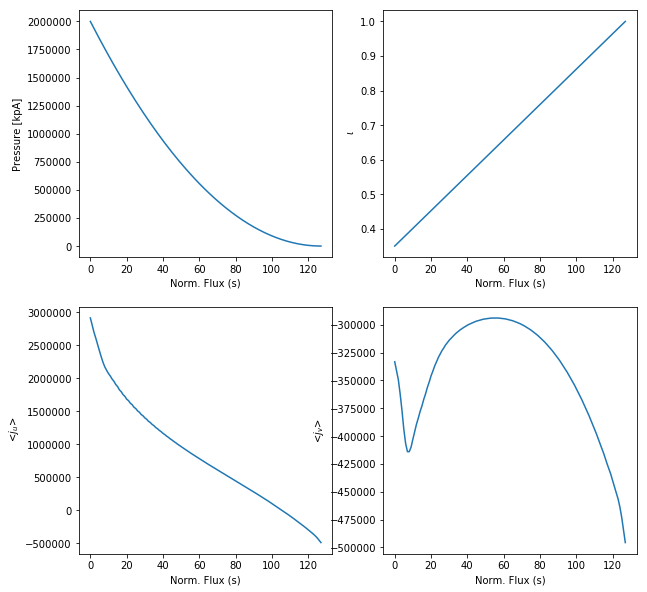

In [4]:
# This section shows how to plot various 1D quantities. We did not need to Fourier transform to plot these.
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1, adjustable='box', xlabel='Norm. Flux (s)',ylabel='Pressure [kpA]')
ax1.plot(v['presf'])
ax2 = fig.add_subplot(2,2,2, adjustable='box', xlabel='Norm. Flux (s)',ylabel=' $\iota$')
ax2.plot(v['iotaf'])
ax3 = fig.add_subplot(2,2,3, adjustable='box', xlabel='Norm. Flux (s)',ylabel=' <$j_u$>')
ax3.plot(v['jcuru'])
ax4 = fig.add_subplot(2,2,4, adjustable='box', xlabel='Norm. Flux (s)',ylabel='<$j_v$>')
ax4.plot(v['jcurv'])
show()

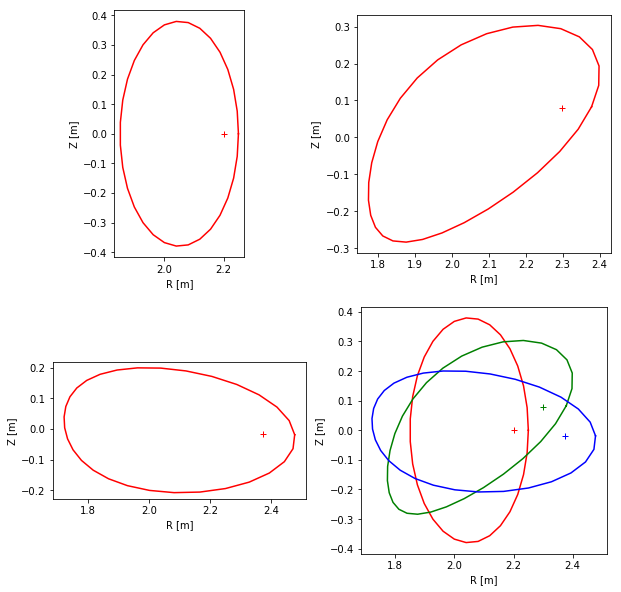

In [5]:
# Now let's make some plots of the flux surfaces of the equilibrium in three cross sections
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.plot(r[ns-1,:,0],z[ns-1,:,0],color='red')
ax1.plot(r[0,0,0],z[0,0,0],'+',color='red')
ax2 = fig.add_subplot(2,2,2, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
dex = round(nv/(4*v['nfp']))
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='red')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='red')
ax3 = fig.add_subplot(2,2,3, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
dex = round(nv/(2*v['nfp'])) # Note it helps is nv is odd
ax3.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='red')
ax3.plot(r[0,0,dex],z[0,0,dex],'+',color='red')
ax2 = fig.add_subplot(2,2,4, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
dex = 0 # Note it helps is nv is odd
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='red')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='red')
dex = round(nv/(4*v['nfp'])) # Note it helps is nv is odd
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='green')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='green')
dex = round(nv/(2*v['nfp'])) # Note it helps is nv is odd
ax2.plot(r[ns-1,:,dex],z[ns-1,:,dex],color='blue')
ax2.plot(r[0,0,dex],z[0,0,dex],'+',color='blue')
show()

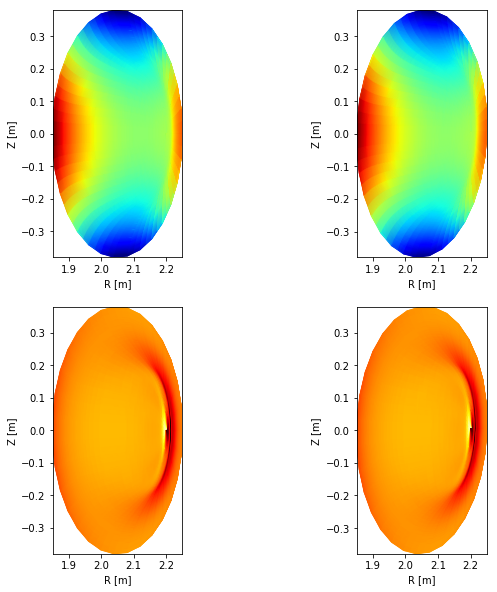

In [6]:
# Now we plot color cross sections of various quantities
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,0],z[:,:,0],b[:,:,0],cmap='jet',shading='gouraud')
ax1 = fig.add_subplot(2,2,2, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,int(nv/6)],z[:,:,int(nv/6)],b[:,:,int(nv/6)],cmap='jet',shading='gouraud')
ax1 = fig.add_subplot(2,2,3, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,0],z[:,:,0],currv[:,:,0]/g[:,:,0],cmap='hot',shading='gouraud')
ax1 = fig.add_subplot(2,2,4, adjustable='box', xlabel='R [m]',ylabel='Z [m]',aspect='equal')
ax1.pcolormesh(r[:,:,int(nv/6)],z[:,:,int(nv/6)],currv[:,:,int(nv/6)]/g[:,:,int(nv/6)],cmap='hot',shading='gouraud')
show()
#help(cm)

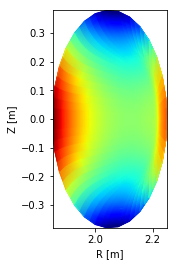

In [7]:
# Of course there is a much easier way to do this.
libstell.torocont(r,z,b,0)

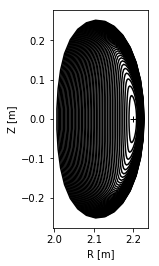

In [8]:
# Also this is much simpler way to plot cross sections as well
libstell.toroslice(r,0,z,range(0,49))

In [11]:
# There is also an easy way to to plot isosurfaces.
from mayavi import *
h=libstell.isotoro(r,z,zeta,[48])
h=libstell.isotoro(r,z,zeta,[48],b)

ModuleNotFoundError: No module named 'mayavi'

That's it for the VMEC wout stuff.  Now we'll use safe_open and read_indata_namelist to read a VMEC input file.

In [20]:
# Now we read the contents of a VMEC input file.
from libstell import *
iunit = 27
iunit2 = 28
istat = 0
recl  = 1
temp=libstell.safe_open(iunit,istat,'../BENCHMARKS/input.QAS','old','formatted',recl,'sequential','none')
test=libstell.read_indata_namelist(iunit,istat)
print(test['pmass_type'])
print(test['am'])
temp = libstell.pmass(0.2)
print(temp)

power_series        
[   68551.76493524    -5120.27745123   -36151.04517455  -474263.01411307
  1788781.9547387  -3215138.2886817   2690410.23837233  -817049.85416837
        0.                0.                0.                0.                0.
        0.                0.                0.                0.                0.
        0.                0.                0.        ]
0.08077976991304622


Now we show how to read and write namelists using read_indata_namelist and write_indata_namelist

In [1]:
from libstell import *
iunit = 27
iunit2 = 28
istat = 0
recl  = 1
print('1 ',type(iunit),type(istat))
temp=libstell.safe_open(iunit,istat,'../BENCHMARKS/input.QAS','old','formatted',recl,'sequential','none')
print('2 ',type(iunit),type(istat))
test=libstell.read_indata_namelist(iunit,istat)
print('3 ',type(iunit),type(istat))
libstell.safe_close(iunit)
iunit = 27
iunit2 = 28
istat = 0
recl  = 1000
print('4 ',type(iunit),type(istat))
temp=libstell.safe_open(iunit2,istat,'../BENCHMARKS/input.new_file','unknown','formatted',recl,'sequential','none')
print('5 ',type(iunit2),type(istat))
istat = 0
temp2=libstell.write_indata_namelist(iunit2,istat)
print('6 ',type(iunit2),type(istat))
libstell.safe_close(iunit)

1  <class 'int'> <class 'int'>
2  <class 'int'> <class 'int'>
3  <class 'int'> <class 'int'>
4  <class 'int'> <class 'int'>
5  <class 'int'> <class 'int'>
6  <class 'int'> <class 'int'>


In this section we switch to STELLOPT and show you how to read in and plot values from the stellopt.ext file.

ITER
VERSION
BALLOON
ORBIT
TARGETS
SIGMAS
VALS
[  0.00000000e+00   1.00000000e+02   0.00000000e+00  -7.29086988e-02
   0.00000000e+00   0.00000000e+00   5.00000000e+00]
ITER <class 'numpy.ndarray'>
VERSION <class 'float'>
BALLOON <class 'numpy.ndarray'>
ORBIT <class 'numpy.ndarray'>
TARGETS <class 'numpy.ndarray'>
SIGMAS <class 'numpy.ndarray'>
VALS <class 'numpy.ndarray'>
BALLOON_target <class 'numpy.ndarray'>
BALLOON_sigma <class 'numpy.ndarray'>
BALLOON_equil <class 'numpy.ndarray'>
BALLOON_chisq <class 'numpy.ndarray'>
BALLOON_grate <class 'numpy.ndarray'>
BALLOON_theta <class 'numpy.ndarray'>
BALLOON_zeta <class 'numpy.ndarray'>
BALLOON_k <class 'numpy.ndarray'>
ORBIT_target <class 'numpy.ndarray'>
ORBIT_sigma <class 'numpy.ndarray'>
ORBIT_equil <class 'numpy.ndarray'>
ORBIT_chisq <class 'numpy.ndarray'>
ORBIT_S <class 'numpy.ndarray'>


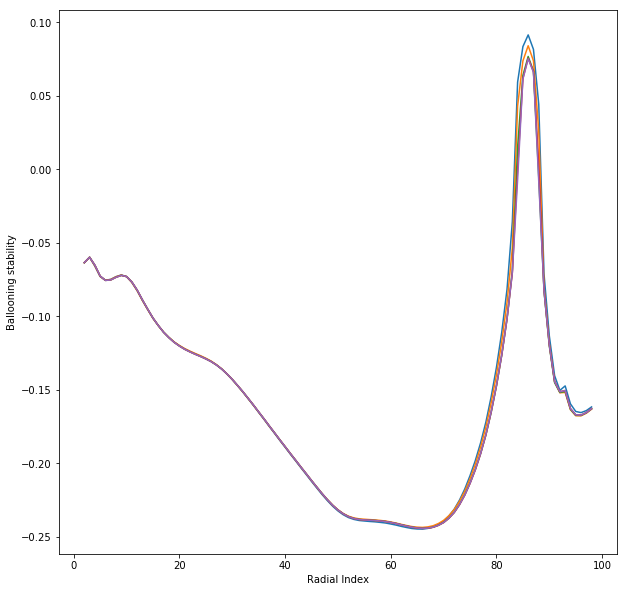

In [24]:

from libstell import *                #Import the LIBSTELL Library
from matplotlib.pyplot import *       #Import matplotlib.pyplot for plotting
stel_data = libstell.read_stellopt('../BENCHMARKS/stellopt.STELLOPT_BENCH')
print(stel_data['BALLOON'][1,3,:])
for item in stel_data:
    print(item,type(stel_data[item]))
fig = figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1, adjustable='box', xlabel='Radial Index',ylabel='Ballooning stability')
ax1.plot(stel_data['BALLOON_k'].transpose(),stel_data['BALLOON_grate'].transpose())
show()

In [16]:
# MayaVI Testing
from numpy import pi, sin, cos, mgrid
dphi,dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0=4; m1=3; m2=2; m3=3; m4=6; m5=2; m6=6; m7=4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3+sin(m4*theta)**m5+cos(m6*theta)**m7
x=r*sin(phi)*cos(theta)
y=r*cos(phi)
z=r*sin(phi)*sin(theta)
from mayavi import mlab

ModuleNotFoundError: No module named 'mayavi'